In [66]:
import pandas as pd
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
import matplotlib as mlt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [44]:
ct_shape = GeoDataFrame.from_file('nyct/nyct2010.shp')
#ct_shape.index=ct_shape.BoroCT2010

In [45]:
ct_shape.head(3)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5.788238e+06,9902.948473,"POLYGON ((967656.8290405273 155637.1314086914,..."
2,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,"POLYGON ((994133.507019043 214848.8975830078, ..."


In [46]:
ct_shape = ct_shape.to_crs( epsg=4326)

In [47]:
ct_shape.columns

Index([u'BoroCT2010',   u'BoroCode',   u'BoroName', u'CDEligibil',
           u'CT2010',    u'CTLabel',    u'NTACode',    u'NTAName',
             u'PUMA', u'Shape_Area', u'Shape_Leng',   u'geometry'],
      dtype='object')

In [48]:
del ct_shape[ct_shape.columns[3]]
del ct_shape[ct_shape.columns[5]]
del ct_shape[ct_shape.columns[6]]
#del ct_shape[ct_shape.columns[8]]  # if delete PUMA,then geometry is gone as well! strange!

In [51]:
del ct_shape['NTAName']

In [53]:
ct_shape.head(3)

,BoroCT2010,BoroCode,BoroName,CT2010,CTLabel,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,000900,9,2.497010e+06,7729.016794,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,5007400,5,Staten Island,007400,74,5.788238e+06,9902.948473,POLYGON ((-74.05974734759455 40.59384861160054...
2,1009800,1,Manhattan,009800,98,1.906016e+06,5534.199811,POLYGON ((-73.96432543478755 40.75638153102423...


In [62]:
brkln = ct_shape[ct_shape.BoroName == "Brooklyn"]
brkln.head(3)

,BoroCT2010,BoroCode,BoroName,CT2010,CTLabel,Shape_Area,Shape_Leng,geometry
27,3000501,3,Brooklyn,000501,5.01,9.015070e+05,4828.169912,POLYGON ((-73.99301822153384 40.69746236460013...
28,3002000,3,Brooklyn,002000,20,1.620770e+06,5426.067279,POLYGON ((-74.01266264860632 40.64925555481491...
29,3004100,3,Brooklyn,004100,41,1.744094e+06,5283.856660,"POLYGON ((-73.9818167744823 40.6873298027983, ..."


In [148]:
cusp =[-73.986403, 40.6932169]
cusp = shapely.geometry.Point(cusp)

In [165]:
for i , ct in enumerate(brkln.geometry):
    if shapely.geometry.asShape(ct).contains(cusp):
        cusp_ct= ct
        break
print cusp_ct
print i

POLYGON ((-73.9851430608965 40.69488514300313, -73.98516822349798 40.69435907633375, -73.9851960499562 40.69377775323942, -73.98519903380242 40.69371550178996, -73.98523569188234 40.69304536294997, -73.98527941476605 40.692157697139, -73.98536391830875 40.6906666136384, -73.98633134976357 40.69105051066406, -73.9864643625356 40.69110361180857, -73.98734787420081 40.69145766847337, -73.98820701393119 40.69180696024278, -73.98893356311613 40.69208664202215, -73.98902944698997 40.69212386155333, -73.98910541743069 40.692153314058, -73.98947238554459 40.69229549438097, -73.99066626290963 40.69249717659385, -73.99097186899586 40.69254880041873, -73.99085041475469 40.69279825068276, -73.99072896048501 40.69304770148094, -73.99058794464068 40.69339137900288, -73.99045286506302 40.69372058430731, -73.99044474094237 40.69382825146695, -73.99066605587349 40.69456882401732, -73.99080803777389 40.69502713382774, -73.99073995964305 40.69503174776942, -73.99009114957468 40.69507576482177, -73.989029

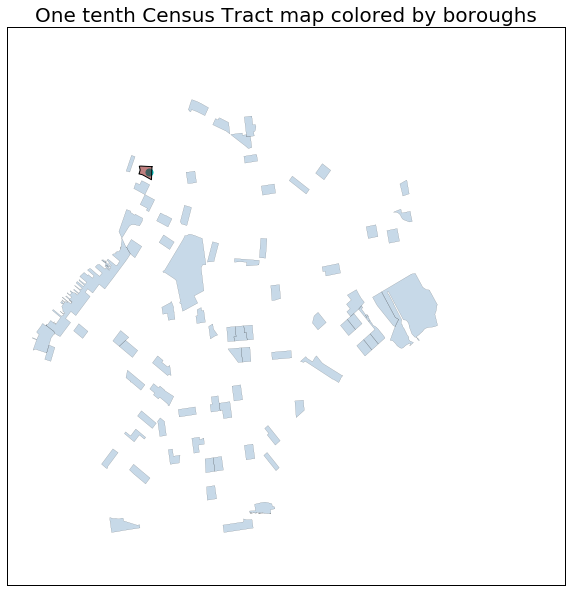

In [205]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
brkln[::10].plot(color = 'steelblue',alpha=0.3,linewidth=0.1,ax=ax)

brkln[i:i+1].plot(alpha=0.5,ax=ax)
cusp =[-73.986403, 40.6932169]
pylab.scatter(cusp[0],cusp[1], color = 'c', alpha =1, s=50)
plt.title("One tenth Census Tract map colored by boroughs",fontsize = 20)

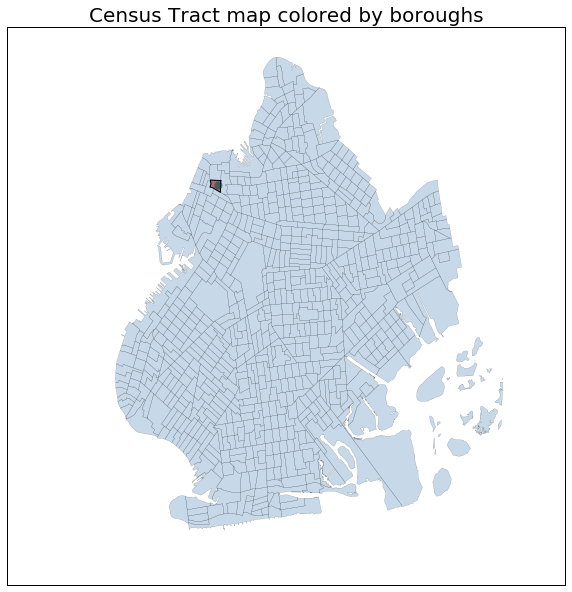

In [206]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
brkln.plot(color = 'steelblue',alpha=0.3,linewidth=0.1,ax=ax)

brkln[i:i+1].plot(alpha=0.5,ax=ax)
cusp =[-73.986403, 40.6932169]
pylab.scatter(cusp[0],cusp[1], color = 'c', alpha =1, s=50)
plt.title("Census Tract map colored by boroughs",fontsize = 20)